**TASK 4**

**Step 1: Import Necessary Libraries**


In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
#from wordcloud import WordCloud

**Step 2: Unzip the Dataset**


In [20]:
with zipfile.ZipFile('/content/twitter_training/twitter_training.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/twitter_training')

**Step 3: Load the Dataset**

In [21]:
df = pd.read_csv('/content/twitter_training/twitter_training.csv', header=None)
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


**Step 4: Rename Columns for Clarity**


In [22]:
df.columns = ['id', 'topic', 'sentiment', 'text']

**Step 5: Define a Text Cleaning Function**

In [23]:
def clean_text(text):
    if isinstance(text, str):  # Check if the entry is a string
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
        text = text.lower()  # Convert to lowercase
    else:
        text = ""  # Replace non-string entries with an empty string
    return text

**Step 6: Apply Text Cleaning to the Dataset**


In [24]:
df['cleaned_text'] = df['text'].apply(clean_text)

**Step 7: Analyze Sentiment Distribution**

In [25]:
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

Sentiment Distribution:
 sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


**Step 8: Visualize Sentiment Distribution**

<ipython-input-26-4b46c67729c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


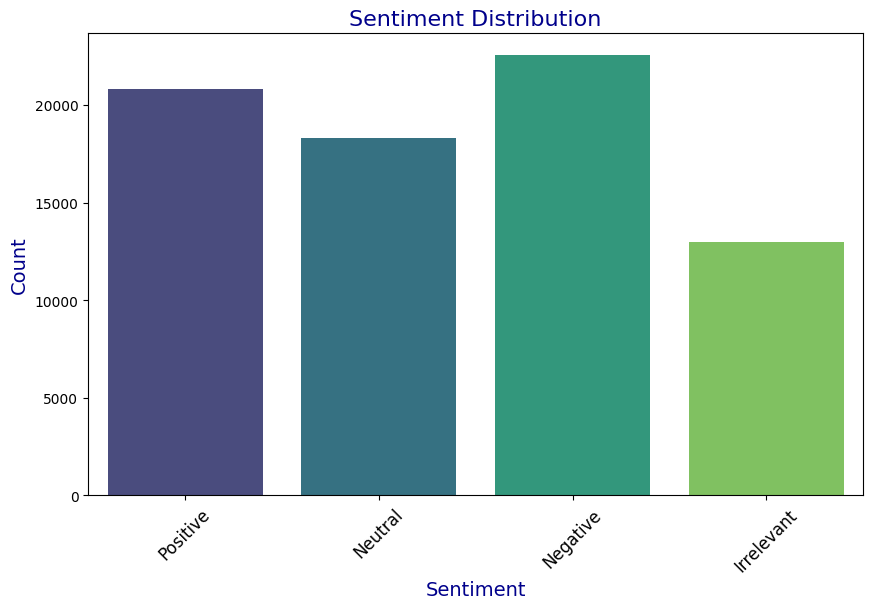

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution", fontsize=16, color='darkblue')
plt.xlabel("Sentiment", fontsize=14, color='darkblue')
plt.ylabel("Count", fontsize=14, color='darkblue')
plt.xticks(fontsize=12, rotation=45)
plt.show()


**Step 9: Sentiment by Topic Analysis**

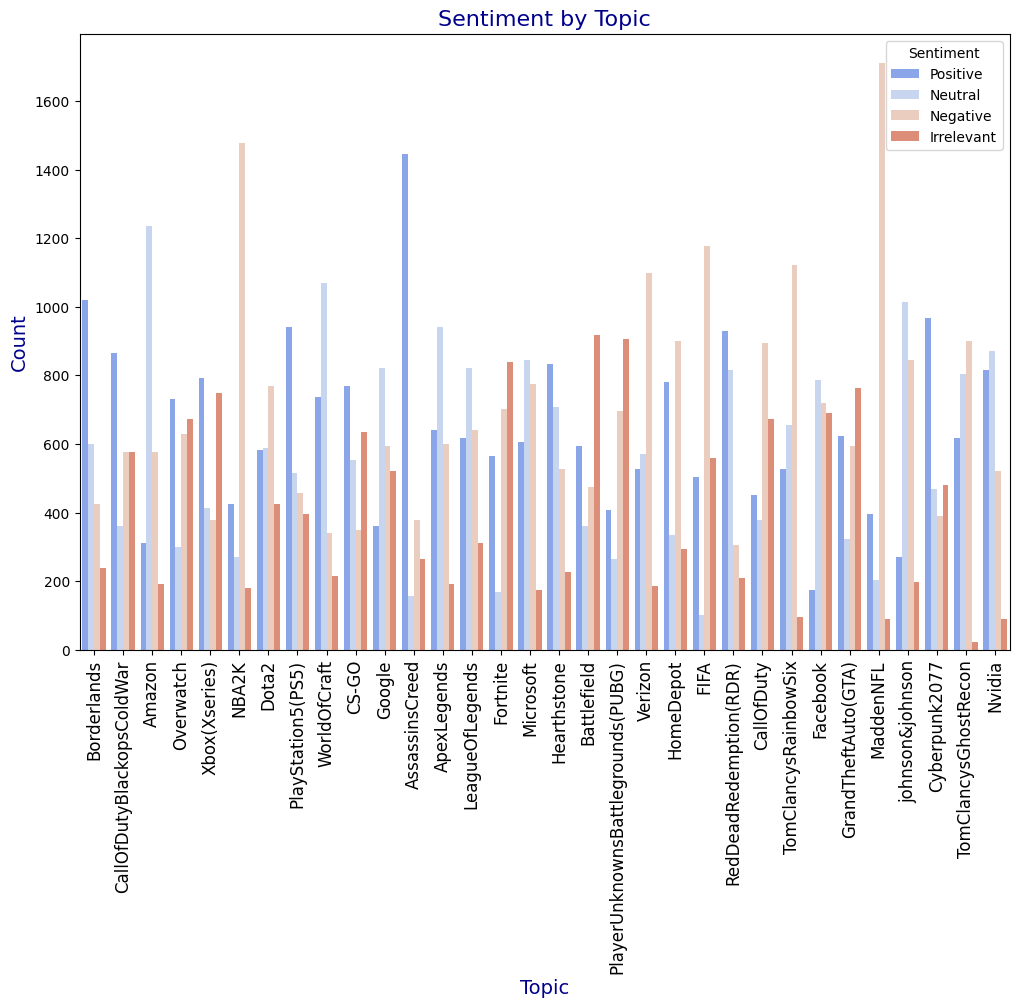

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='topic', hue='sentiment', palette='coolwarm')
plt.title("Sentiment by Topic", fontsize=16, color='darkblue')
plt.xlabel("Topic", fontsize=14, color='darkblue')
plt.ylabel("Count", fontsize=14, color='darkblue')
plt.xticks(fontsize=12, rotation=90)
plt.legend(title='Sentiment')
plt.show()


**Step 10: Word Count Distribution Analysis**

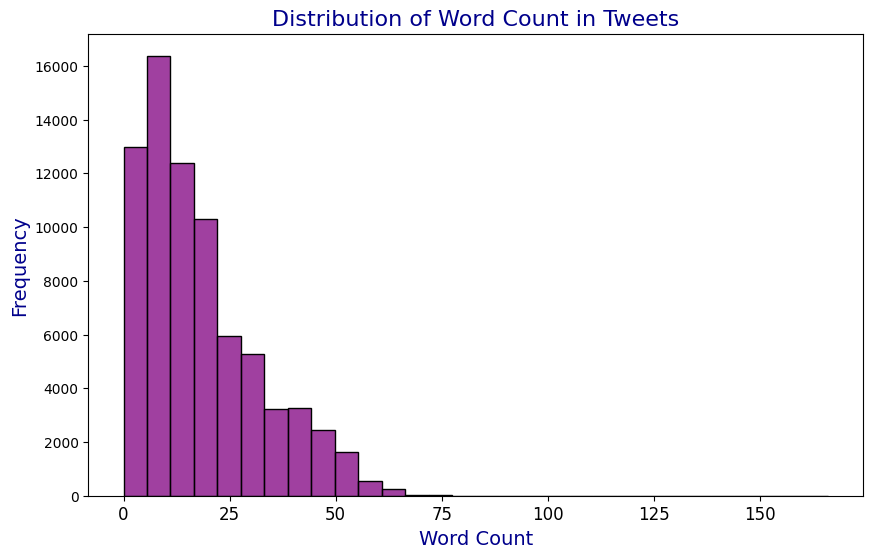

In [28]:
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='word_count', bins=30, color='purple')
plt.title("Distribution of Word Count in Tweets", fontsize=16, color='darkblue')
plt.xlabel("Word Count", fontsize=14, color='darkblue')
plt.ylabel("Frequency", fontsize=14, color='darkblue')
plt.xticks(fontsize=12)
plt.show()

**Step 11: Calculate and Visualize Average Word Count by Sentiment**


Average Word Count by Sentiment:
 sentiment
Irrelevant    18.573595
Negative      19.236758
Neutral       18.603778
Positive      16.400682
Name: word_count, dtype: float64


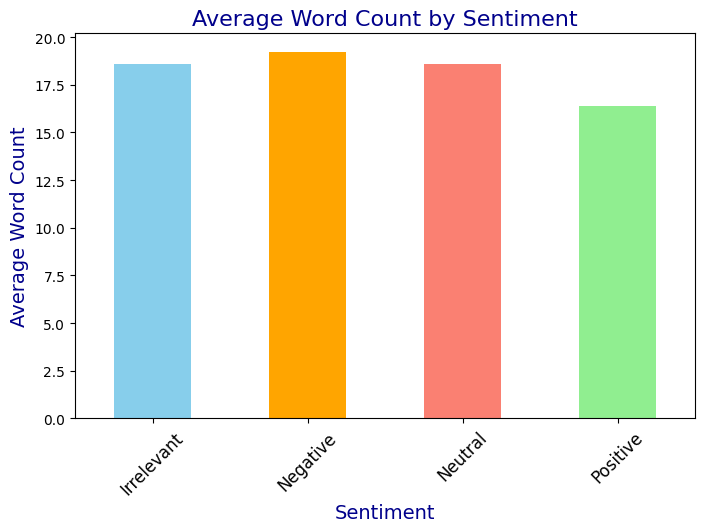

In [29]:
avg_word_count = df.groupby('sentiment')['word_count'].mean()
print("\nAverage Word Count by Sentiment:\n", avg_word_count)

plt.figure(figsize=(8, 5))
avg_word_count.plot(kind='bar', color=['skyblue', 'orange', 'salmon', 'lightgreen'])
plt.title("Average Word Count by Sentiment", fontsize=16, color='darkblue')
plt.xlabel("Sentiment", fontsize=14, color='darkblue')
plt.ylabel("Average Word Count", fontsize=14, color='darkblue')
plt.xticks(rotation=45, fontsize=12)
plt.show()

S**tep 12: Generate Word Clouds for Each Sentiment**


In [30]:
def plot_wordcloud(sentiment):
    text_data = " ".join(df[df['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment", fontsize=16, color='darkblue')
    plt.show()

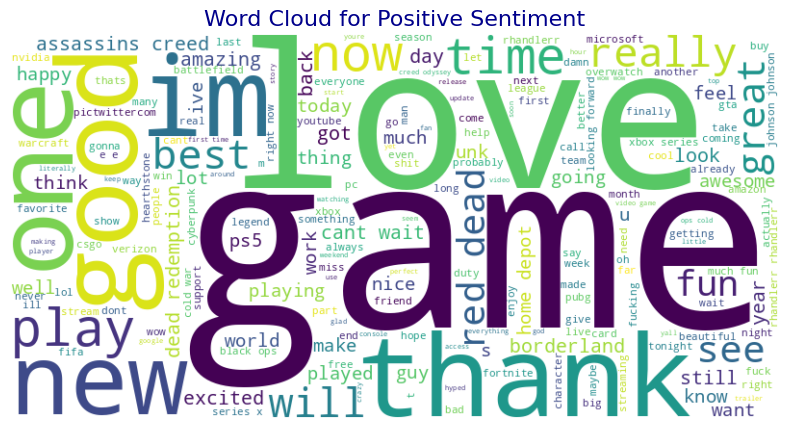

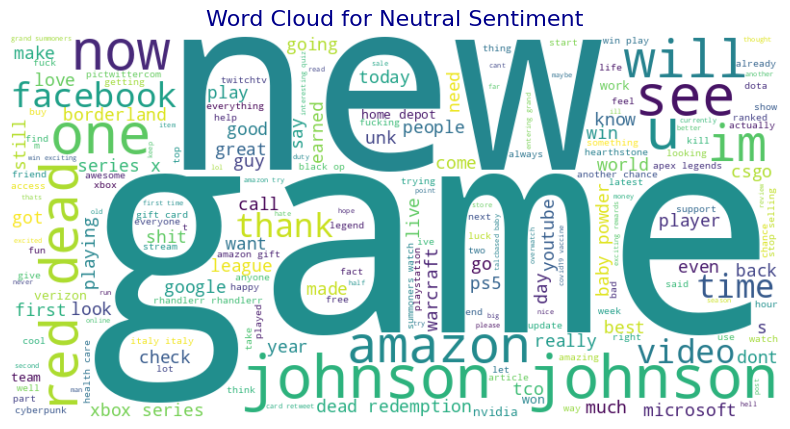

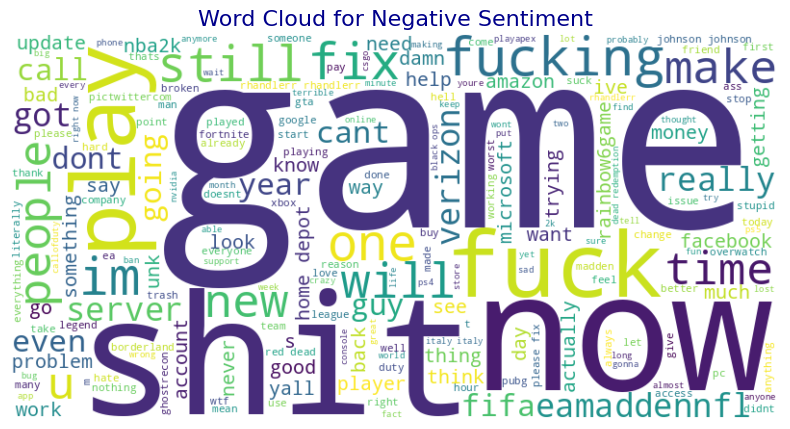

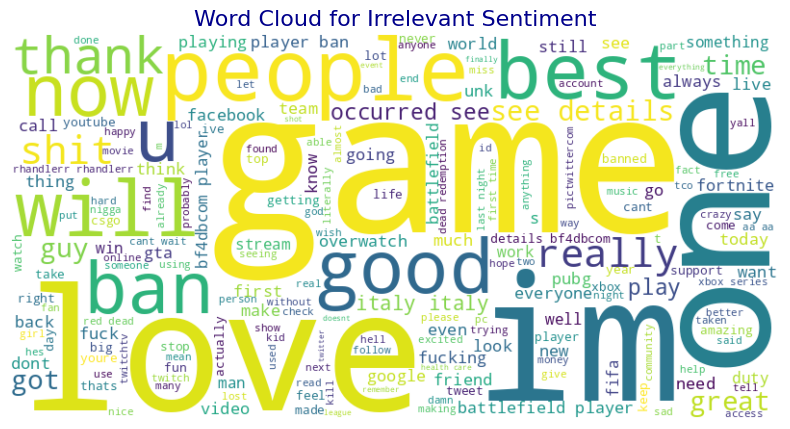

In [31]:
for sentiment in df['sentiment'].unique():
    plot_wordcloud(sentiment)